## Exercise

Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.


- Measure prediction score using default n_estimators (10)
- Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

In [7]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [8]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
# let's create a data frame

In [13]:
df = pd.DataFrame(iris.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
# let's append column names as feature_name
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
# let's append target inside the data set
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
df[df.target== 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [41]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [48]:
# now let's append flowe_names
import numpy as np
#df['flower_name'] = iris.target.apply(lambda x: iris.target_names[x])
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [49]:
# now let's assign the values of x and y

In [51]:
x = df.drop(['flower_name', 'target'], axis='columns')
y = df.target

In [52]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [55]:
# now let's split and train the data

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [59]:
len(x_train)

105

In [60]:
len(x_test)

45

In [61]:
len(x)

150

In [62]:
# now let's import the package needed as per the excercise

In [63]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [64]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [65]:
model.score(x_test,y_test)
# our tested model is 93.33% accurate

0.9333333333333333

In [67]:
model.score(x_train,y_train)
# our actual trained model is 100% accurate

1.0

### let's use n_estimators as per the excercise

In [69]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
# here we are adding n_estimators

In [70]:
# let's fit values for our model

In [71]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [75]:
model.score(x_test,y_test)
# our tested model is 93.33% accurate

0.9333333333333333

In [76]:
model.score(x_train,y_train)
# our actual trained model is 99.04% accurate

0.9904761904761905

### let's chk the accuracy by confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix
cm

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [101]:
y_predicted = model.predict(x_test)

In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm
# note in connfusion_matrix we should assign the value or else it wont work
# we wont be getting the heatmap image in below

array([[16,  0,  0],
       [ 0, 13,  0],
       [ 0,  3, 13]], dtype=int64)

Text(69.0, 0.5, 'Truth')

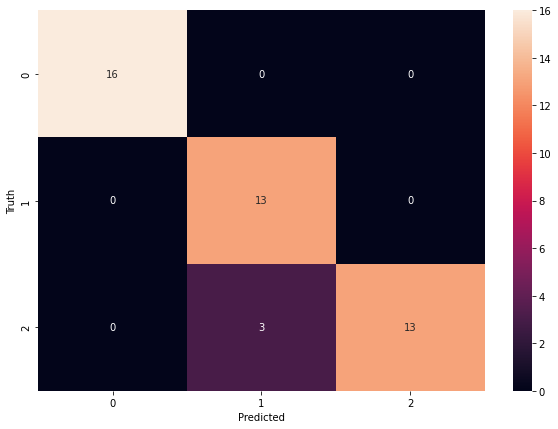

In [106]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Let's do some plotting and analysis

### These are not mentioned in the excercise but we tried

In [93]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

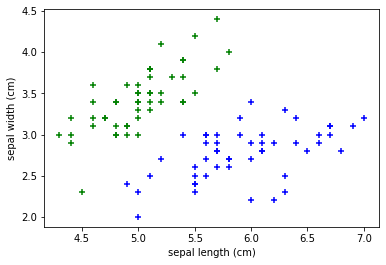

In [92]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='+')

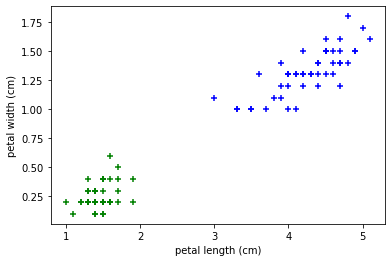

In [94]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='+')

### Steps done

- importing iris data from sklearn package, we are importing iris data as per the excercise task
- naming the package
- looking at the columns
- considering data and target columns
- creating dataframe, with data and appending the column name as feature_names
- appending target, feature_names column in our data set
- assigning the values of x and y 
- where in x we are considering all by droping target and flower_name
- where in y we are just considering only target column
- then we are splitting our data to train and test the data
- then we are importing randomforestclassifier package form sklearn.ensemble
- let's fit our training data in our model
- then prediction is done
- accuracy score for train and test is calculated
- also to chk the accuracy even more clear, confusion matrix is imported
- also we can plot a seaborn map thru matplotlib and seaborn package
- Note : extra point, plotting the scatter graph is done for our purpose of understanding thru data exploration and analysis